# linear regression

(96453, 12)
mean_x= 11.93267843751188
mean_y= 0.7348989663359355
m= -0.012939114669679756 c= 0.8892972609553168


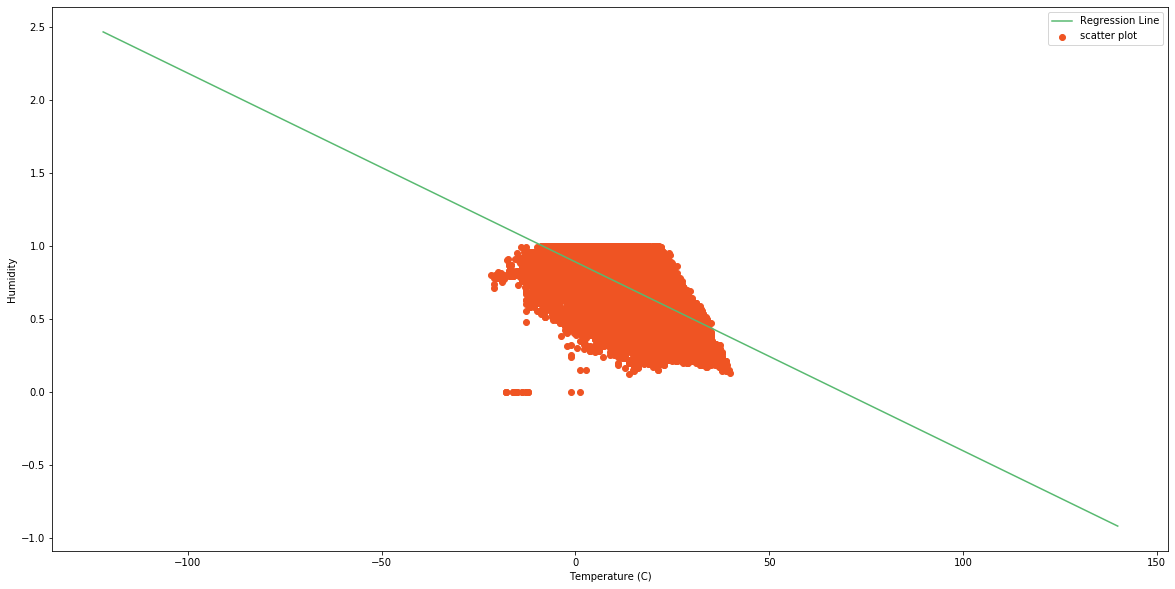

R2=  0.6002540259055625


In [53]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

data = pd.read_csv('weatherHistory.csv')
print(data.shape)
data.head(10)


X=data['Temperature (C)'].values
Y=data['Humidity'].values


# mean X and Y
mean_X=np.mean(X)
mean_Y=np.mean(Y)
print("mean_x=",mean_X)
print("mean_y=",mean_Y)
#Total number of values
n=len(X)

#y=b1x+b0
#using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(n):
    numer +=(X[i] - mean_X)*(Y[i] - mean_Y)
    denom +=(X[i] - mean_X)**2
m = numer/denom
c=mean_Y-(m*mean_X)

#print coefficients
print("m=",m,"c=",c)


max_X=np.max(X)+100
min_X=np.min(X)-100

x=np.linspace(min_X,max_X,1000)
y=c+m*x

plt.plot(x,y,color='#58b970',label='Regression Line')
#plotting Scatter points
plt.scatter(X,Y,c='#ef5423',label='scatter plot')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.legend()
plt.show()


ss_t=0
ss_r=0
for i in range(n):
    y_pred=c+(m*X[i])
    ss_r+=(y_pred-mean_Y)**2
    ss_t+=(Y[i]-mean_Y)**2
r2=1-(ss_r/ss_t)
print("R2= ",r2)

# example 2

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math

candy_data=pd.read_csv('candy-data.csv')
print(candy_data.shape)
candy_data.head(5)

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [122]:
candy_data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [123]:
candy_data.drop("competitorname",axis=1,inplace=True)

In [124]:
x=candy_data.drop("chocolate",axis=1)
y=candy_data["chocolate"]

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logmodel=LogisticRegression()

In [129]:
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
predictions=logmodel.predict(x_test)

In [131]:
from sklearn.metrics import classification_report

In [132]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.86      0.92        14\n           1       0.86      1.00      0.92        12\n\n    accuracy                           0.92        26\n   macro avg       0.93      0.93      0.92        26\nweighted avg       0.93      0.92      0.92        26\n'

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
confusion_matrix(y_test,predictions)

array([[12,  2],
       [ 0, 12]], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(y_test,predictions)

0.9230769230769231